In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [3]:
 df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [4]:
# No null values

In [5]:
# removing extra space from the columns variable
cols = [i.strip() for i in df.columns]
df.columns = cols

In [6]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

There seems to be some outlier in the shares feature. Hence dropping it.

In [7]:
df_original = df.copy()

In [8]:
df = df[df['shares'] < 3*df['shares'].std()] # Taking 3sigma and the values above it are considered as outliers and dropping those.

In [9]:
df = df.drop(['url','timedelta'],axis=1)

In [10]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [11]:
num_cols = ['n_tokens_title','n_tokens_content','n_unique_tokens',
       'n_non_stop_words','n_non_stop_unique_tokens','num_hrefs',
       'num_self_hrefs','num_imgs','num_videos','average_token_length',
       'num_keywords','kw_min_min','kw_max_min','kw_avg_min',
       'kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']

cat_cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

In [12]:
df['shares'].describe()

count    39292.000000
mean      2717.689453
std       3787.310593
min          1.000000
25%        942.000000
50%       1400.000000
75%       2700.000000
max      34800.000000
Name: shares, dtype: float64

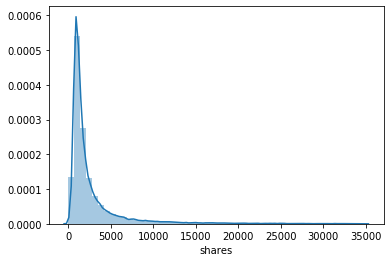

In [13]:
sns.distplot(df['shares'])

Taking the mean of shares and the shares which are shares above the mean are considered as popular article and less than it are classified as unpopular.

In [14]:
df['popularity'] = df['shares'].apply(lambda x: 1 if x > df['shares'].median() else 0)

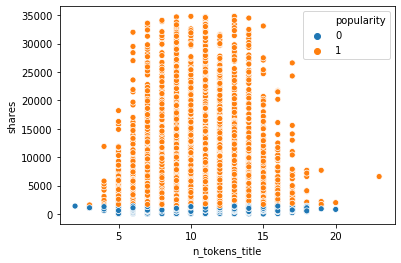

In [15]:
# n_tokens_title
sns.scatterplot(df['n_tokens_title'],df['shares'],hue=df['popularity'])

In [16]:
#  Most popular articles are having 6-16 number of words in the title.

In [17]:
# n_tokens_content
df['n_tokens_content'].describe()

count    39292.000000
mean       546.872824
std        470.501443
min          0.000000
25%        247.000000
50%        410.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [18]:
# Number of words in the content = 0, doesnot make any sense, either we are going to drop it or impute it.

In [19]:
df[df['n_tokens_content'] == 0] # we are dropping, as many missing value exist in most of the columns.

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
893              10.0               0.0              0.0               0.0   
917               8.0               0.0              0.0               0.0   
1062             12.0               0.0              0.0               0.0   
1121             10.0               0.0              0.0               0.0   
1312             14.0               0.0              0.0               0.0   
...               ...               ...              ...               ...   
39598            11.0               0.0              0.0               0.0   
39601            12.0               0.0              0.0               0.0   
39613            12.0               0.0              0.0               0.0   
39615            11.0               0.0              0.0               0.0   
39616            15.0               0.0              0.0               0.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
893                         0.0        0.0             0.0      10.0   
917                         0.0        0.0             0.0       0.0   
1062                        0.0        0.0             0.0       0.0   
1121                        0.0        0.0             0.0       0.0   
1312                        0.0        0.0             0.0       0.0   
...                         ...        ...             ...       ...   
39598                       0.0        0.0             0.0       0.0   
39601                       0.0        0.0             0.0       0.0   
39613                       0.0        0.0             0.0      14.0   
39615                       0.0        0.0             0.0      21.0   
39616                       0.0        0.0             0.0       0.0   

       num_videos  average_token_length  ...  max_positive_polarity  \
893           0.0                   0.0  ...                    0.0   
917           0.0                   0.0  ...                    0.0   
1062          0.0                   0.0  ...                    0.0   
1121          0.0                   0.0  ...                    0.0   
1312          0.0                   0.0  ...                    0.0   
...           ...                   ...  ...                    ...   
39598         1.0                   0.0  ...                    0.0   
39601         1.0                   0.0  ...                    0.0   
39613         0.0                   0.0  ...                    0.0   
39615         1.0                   0.0  ...                    0.0   
39616         1.0                   0.0  ...                    0.0   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
893                      0.0                    0.0                    0.0   
917                      0.0                    0.0                    0.0   
1062                     0.0                    0.0                    0.0   
1121                     0.0                    0.0                    0.0   
1312                     0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
39598                    0.0                    0.0                    0.0   
39601                    0.0                    0.0                    0.0   
39613                    0.0                    0.0                    0.0   
39615                    0.0                    0.0                    0.0   
39616                    0.0                    0.0                    0.0   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
893              0.550000                 -0.500000                0.050000   
917              0.000000                  0.000000                0.500000   
1062             0.000000                  0.000000                0.500000   
1121             0.066667                  0.033333                0.433333   
1312             0.2

In [20]:
df = df[df['n_tokens_content'] != 0]

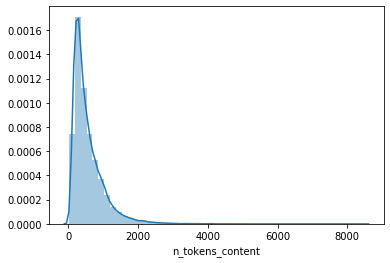

In [21]:
sns.distplot(df['n_tokens_content']) # either there are some extreme value exist or some outliers exist.

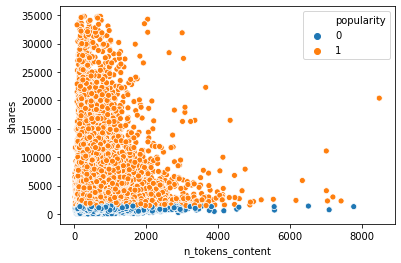

In [22]:
sns.scatterplot(df['n_tokens_content'],df['shares'],hue=df['popularity'])

In [23]:
# The popularity is more for the articles which are having n_tokens_content in the range of 0 to 2000.

In [24]:
# n_unique_tokens
df['n_unique_tokens'].describe()

count    38126.000000
mean         0.564997
std          3.588763
min          0.114964
25%          0.477273
50%          0.542700
75%          0.610778
max        701.000000
Name: n_unique_tokens, dtype: float64

In [25]:
df[df['n_unique_tokens'] > 1] # removing the outlier from n_unique_tokens feature.

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  ...  max_positive_polarity  \
31037         0.0              4.696178  ...                    0.0   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
31037                 0.0                       0.0                     0.0   

       abs_title_sentiment_polarity  shares  popularity  
31037                           0.0    5900           1  

[1 rows x 60 columns]

In [26]:
df = df[df['n_unique_tokens']<1]

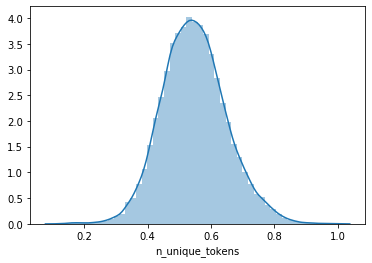

In [27]:
sns.distplot(df['n_unique_tokens'])

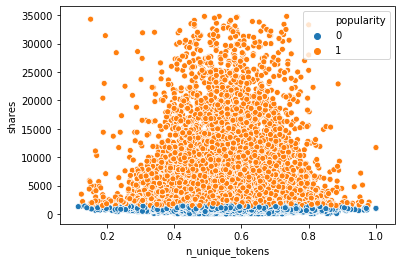

In [28]:
sns.scatterplot(df['n_unique_tokens'],df['shares'],hue=df['popularity'])

In [29]:
# n_non_stop_words
df['n_non_stop_words'].describe()

count    3.812500e+04
mean     1.000000e+00
std      4.021541e-09
min      9.999999e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: n_non_stop_words, dtype: float64

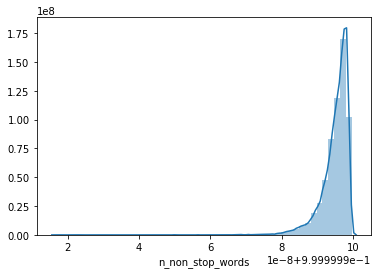

In [30]:
sns.distplot(df['n_non_stop_words'])

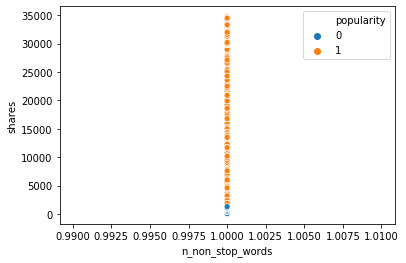

In [31]:
sns.scatterplot(df['n_non_stop_words'],df['shares'],hue=df['popularity'])

In [32]:
# n_non_stop_unique_tokens
df['n_non_stop_unique_tokens'].describe()

count    38125.000000
mean         0.693362
std          0.100530
min          0.119134
25%          0.632629
50%          0.693642
75%          0.756757
max          1.000000
Name: n_non_stop_unique_tokens, dtype: float64

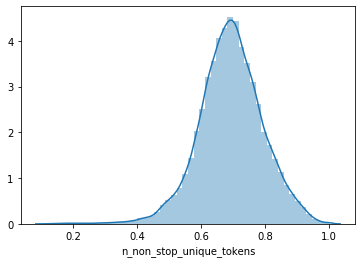

In [33]:
sns.distplot(df['n_non_stop_unique_tokens'])

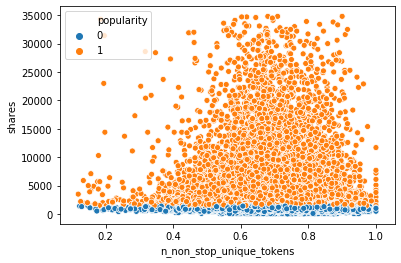

In [34]:
sns.scatterplot(df['n_non_stop_unique_tokens'],df['shares'],hue=df['popularity'])

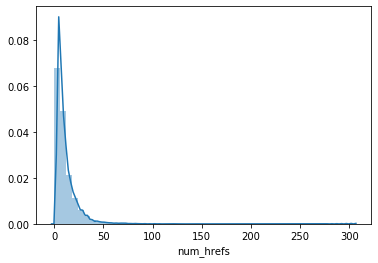

In [35]:
# num_hrefs
sns.distplot(df['num_hrefs'])

In [36]:
df[df['num_hrefs'] > 150]

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
3859             10.0            1178.0         0.561487               1.0   
13008             9.0            1729.0         0.396729               1.0   
17709             8.0            1679.0         0.382517               1.0   
22697             6.0            2808.0         0.382540               1.0   
23441            12.0            1412.0         0.466718               1.0   
23472            10.0            1361.0         0.481301               1.0   
23473            13.0            1287.0         0.477292               1.0   
37743            10.0            1903.0         0.393378               1.0   
38174            11.0            1377.0         0.447988               1.0   
39338            11.0            1390.0         0.622610               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
3859                   0.675000      171.0             2.0       1.0   
13008                  0.504202      152.0             3.0      76.0   
17709                  0.492958      187.0             4.0      11.0   
22697                  0.524076      159.0             3.0       1.0   
23441                  0.578831      153.0             3.0       6.0   
23472                  0.577181      158.0             3.0      11.0   
23473                  0.565217      162.0             3.0      14.0   
37743                  0.480993      161.0             3.0       1.0   
38174                  0.511220      186.0             3.0       1.0   
39338                  0.651571      304.0             6.0       1.0   

       num_videos  average_token_length  ...  max_positive_polarity  \
3859          0.0              5.177419  ...               1.000000   
13008         0.0              5.664546  ...               1.000000   
17709         0.0              4.918999  ...               1.000000   
22697         0.0              4.706197  ...               1.000000   
23441         0.0              5.036827  ...               1.000000   
23472         0.0              5.136664  ...               1.000000   
23473         0.0              5.170940  ...               1.000000   
37743         5.0              5.314241  ...               1.000000   
38174         0.0              5.402324  ...               1.000000   
39338         0.0              6.418705  ...               0.733333   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
3859               -0.374370                   -0.8                 -0.050   
13008              -0.298133                   -0.6                 -0.125   
17709              -0.324077                   -1.0                 -0.050   
22697              -0.281661                   -0.7                 -0.100   
23441              -0.433466                   -1.0                 -0.050   
23472              -0.358112                   -1.0                 -0.050   
23473              -0.390826                   -1.0                 -0.050   
37743              -0.192546                   -0.5                 -0.050   
38174              -0.174679                   -0.3                 -0.050   
39338              -0.327500                   -0.8                 -0.100   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
3859             0.200000                 -0.100000                0.300000   
13008            0.000000                  0.000000                0.500000   
17709            1.000000                 -0.333333                0.500000   
22697            1.000000                  0.500000                0.500000   
23441            0.700000                  0.050000                0.200000   
23472            0.400000                 -0.400000                0.100000   
23473            0.485714                 -0.092857                0.014286   
37743            0.433333                 -0.166667                0.066667   
381

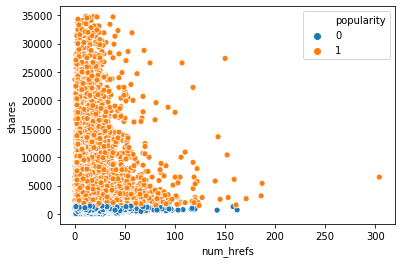

In [37]:
sns.scatterplot(df['num_hrefs'],df['shares'],hue=df['popularity'])

In [38]:
df['num_hrefs'].sum()

426226.0

In [292]:
# df.groupby(['data_channel','popularity'])['num_hrefs'].mean().plot(kind='bar')

In [291]:
# sns.barplot(df['data_channel'],df['num_hrefs'],hue=df['popularity'])

In [41]:
# df.groupby(by='data_channel')['num_hrefs'].mean()

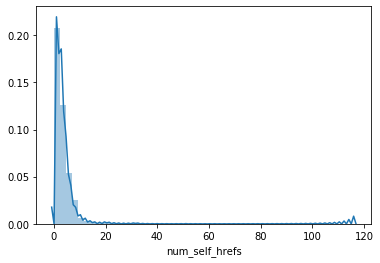

In [42]:
# num_self_hrefs
sns.distplot(df['num_self_hrefs'])

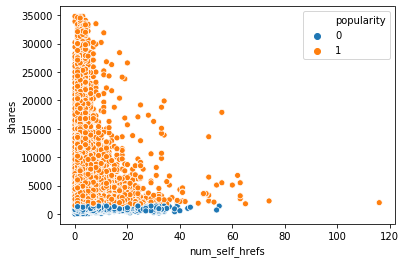

In [43]:
sns.scatterplot(df['num_self_hrefs'],df['shares'],hue=df['popularity'])

In [44]:
a1 = df[(df['num_self_hrefs'] > 0) & (df['num_self_hrefs'] < 20)]

In [45]:
a1[a1['popularity'] == 1]

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
2                 9.0             211.0         0.575130               1.0   
13                9.0             285.0         0.744186               1.0   
16                8.0            1118.0         0.512397               1.0   
18               11.0             103.0         0.689320               1.0   
20               13.0            1248.0         0.390638               1.0   
...               ...               ...              ...               ...   
39632            15.0             580.0         0.506261               1.0   
39636             8.0            2509.0         0.348878               1.0   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
2                      0.663866        3.0             1.0       1.0   
13                     0.841530        4.0             2.0       0.0   
16                     0.709770       26.0            18.0      12.0   
18                     0.806452        3.0             1.0       1.0   
20                     0.523388       21.0            19.0      20.0   
...                         ...        ...             ...       ...   
39632                  0.661891       15.0             2.0       3.0   
39636                  0.464923       23.0             1.0      10.0   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   

       num_videos  average_token_length  ...  max_positive_polarity  \
2             0.0              4.393365  ...                   1.00   
13           21.0              4.343860  ...                   1.00   
16            1.0              4.703936  ...                   1.00   
18            0.0              4.844660  ...                   0.50   
20            0.0              4.686699  ...                   1.00   
...           ...                   ...  ...                    ...   
39632         0.0              5.005172  ...                   0.80   
39636         0.0              4.569550  ...                   1.00   
39639         1.0              4.523121  ...                   0.75   
39640        48.0              4.405488  ...                   0.70   
39641         1.0              5.076923  ...                   0.50   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
2                  -0.466667                 -0.800              -0.133333   
13                 -0.337889                 -0.700              -0.100000   
16                 -0.401437                 -1.000              -0.050000   
18                 -0.125000                 -0.125              -0.125000   
20                 -0.206548                 -0.500              -0.050000   
...                      ...                    ...                    ...   
39632              -0.115000                 -0.125              -0.100000   
39636              -0.231612                 -0.600              -0.050000   
39639              -0.260000                 -0.500              -0.125000   
39640              -0.211111                 -0.400              -0.100000   
39641              -0.356439                 -0.800              -0.166667   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
2                0.000000                  0.000000                0.500000   
13               1.000000                 -1.000000                0.500000   
16               0.566667                 -0.100000                0.066667   
18               0.857143                 -0.714286                0.357143   
20               0.0

In [46]:
# Most of the popular articles have num_self_hrefs between 0 to 20.

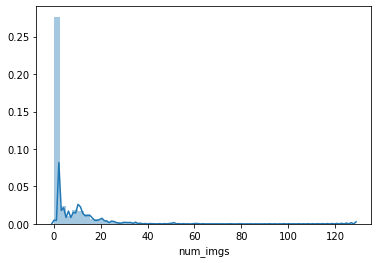

In [47]:
# num_imgs
sns.distplot(df['num_imgs'])

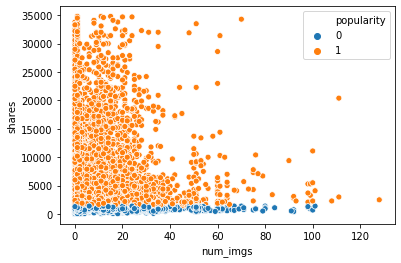

In [48]:
sns.scatterplot(df['num_imgs'],df['shares'],hue=df['popularity'])

In [49]:
# Most of the popular article has num_imgs in the range of 0-20.

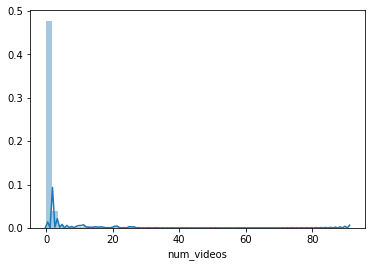

In [50]:
# num_videos
sns.distplot(df['num_videos'])

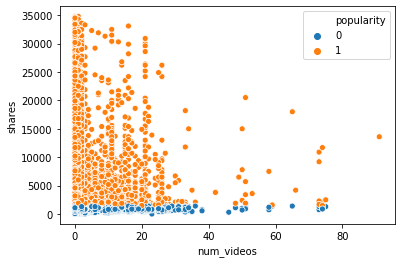

In [51]:
sns.scatterplot(df['num_videos'],df['shares'],hue=df['popularity'])

In [52]:
# Most of the popular article has num_videos less than 10.

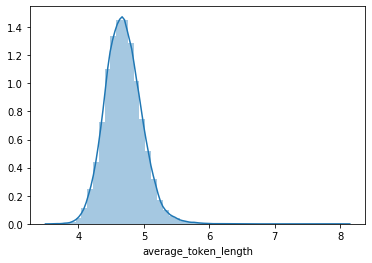

In [53]:
# average_token_length
sns.distplot(df['average_token_length'])

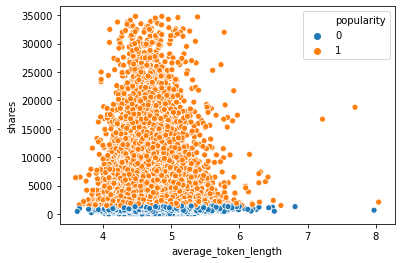

In [54]:
sns.scatterplot(df['average_token_length'],df['shares'],hue=df['popularity'])

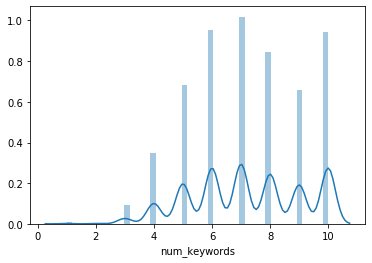

In [55]:
# num_keywords
sns.distplot(df['num_keywords'])

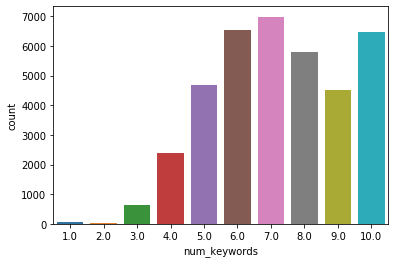

In [56]:
sns.countplot(df['num_keywords'])

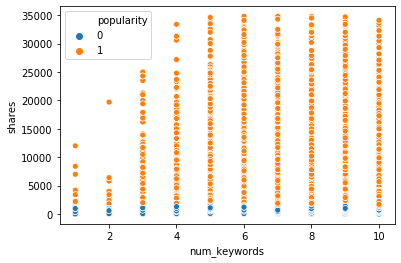

In [57]:
sns.scatterplot(df['num_keywords'],df['shares'],hue=df['popularity'])

In [58]:
# There are more popular articles in the range for num_keywords greater than 5-10

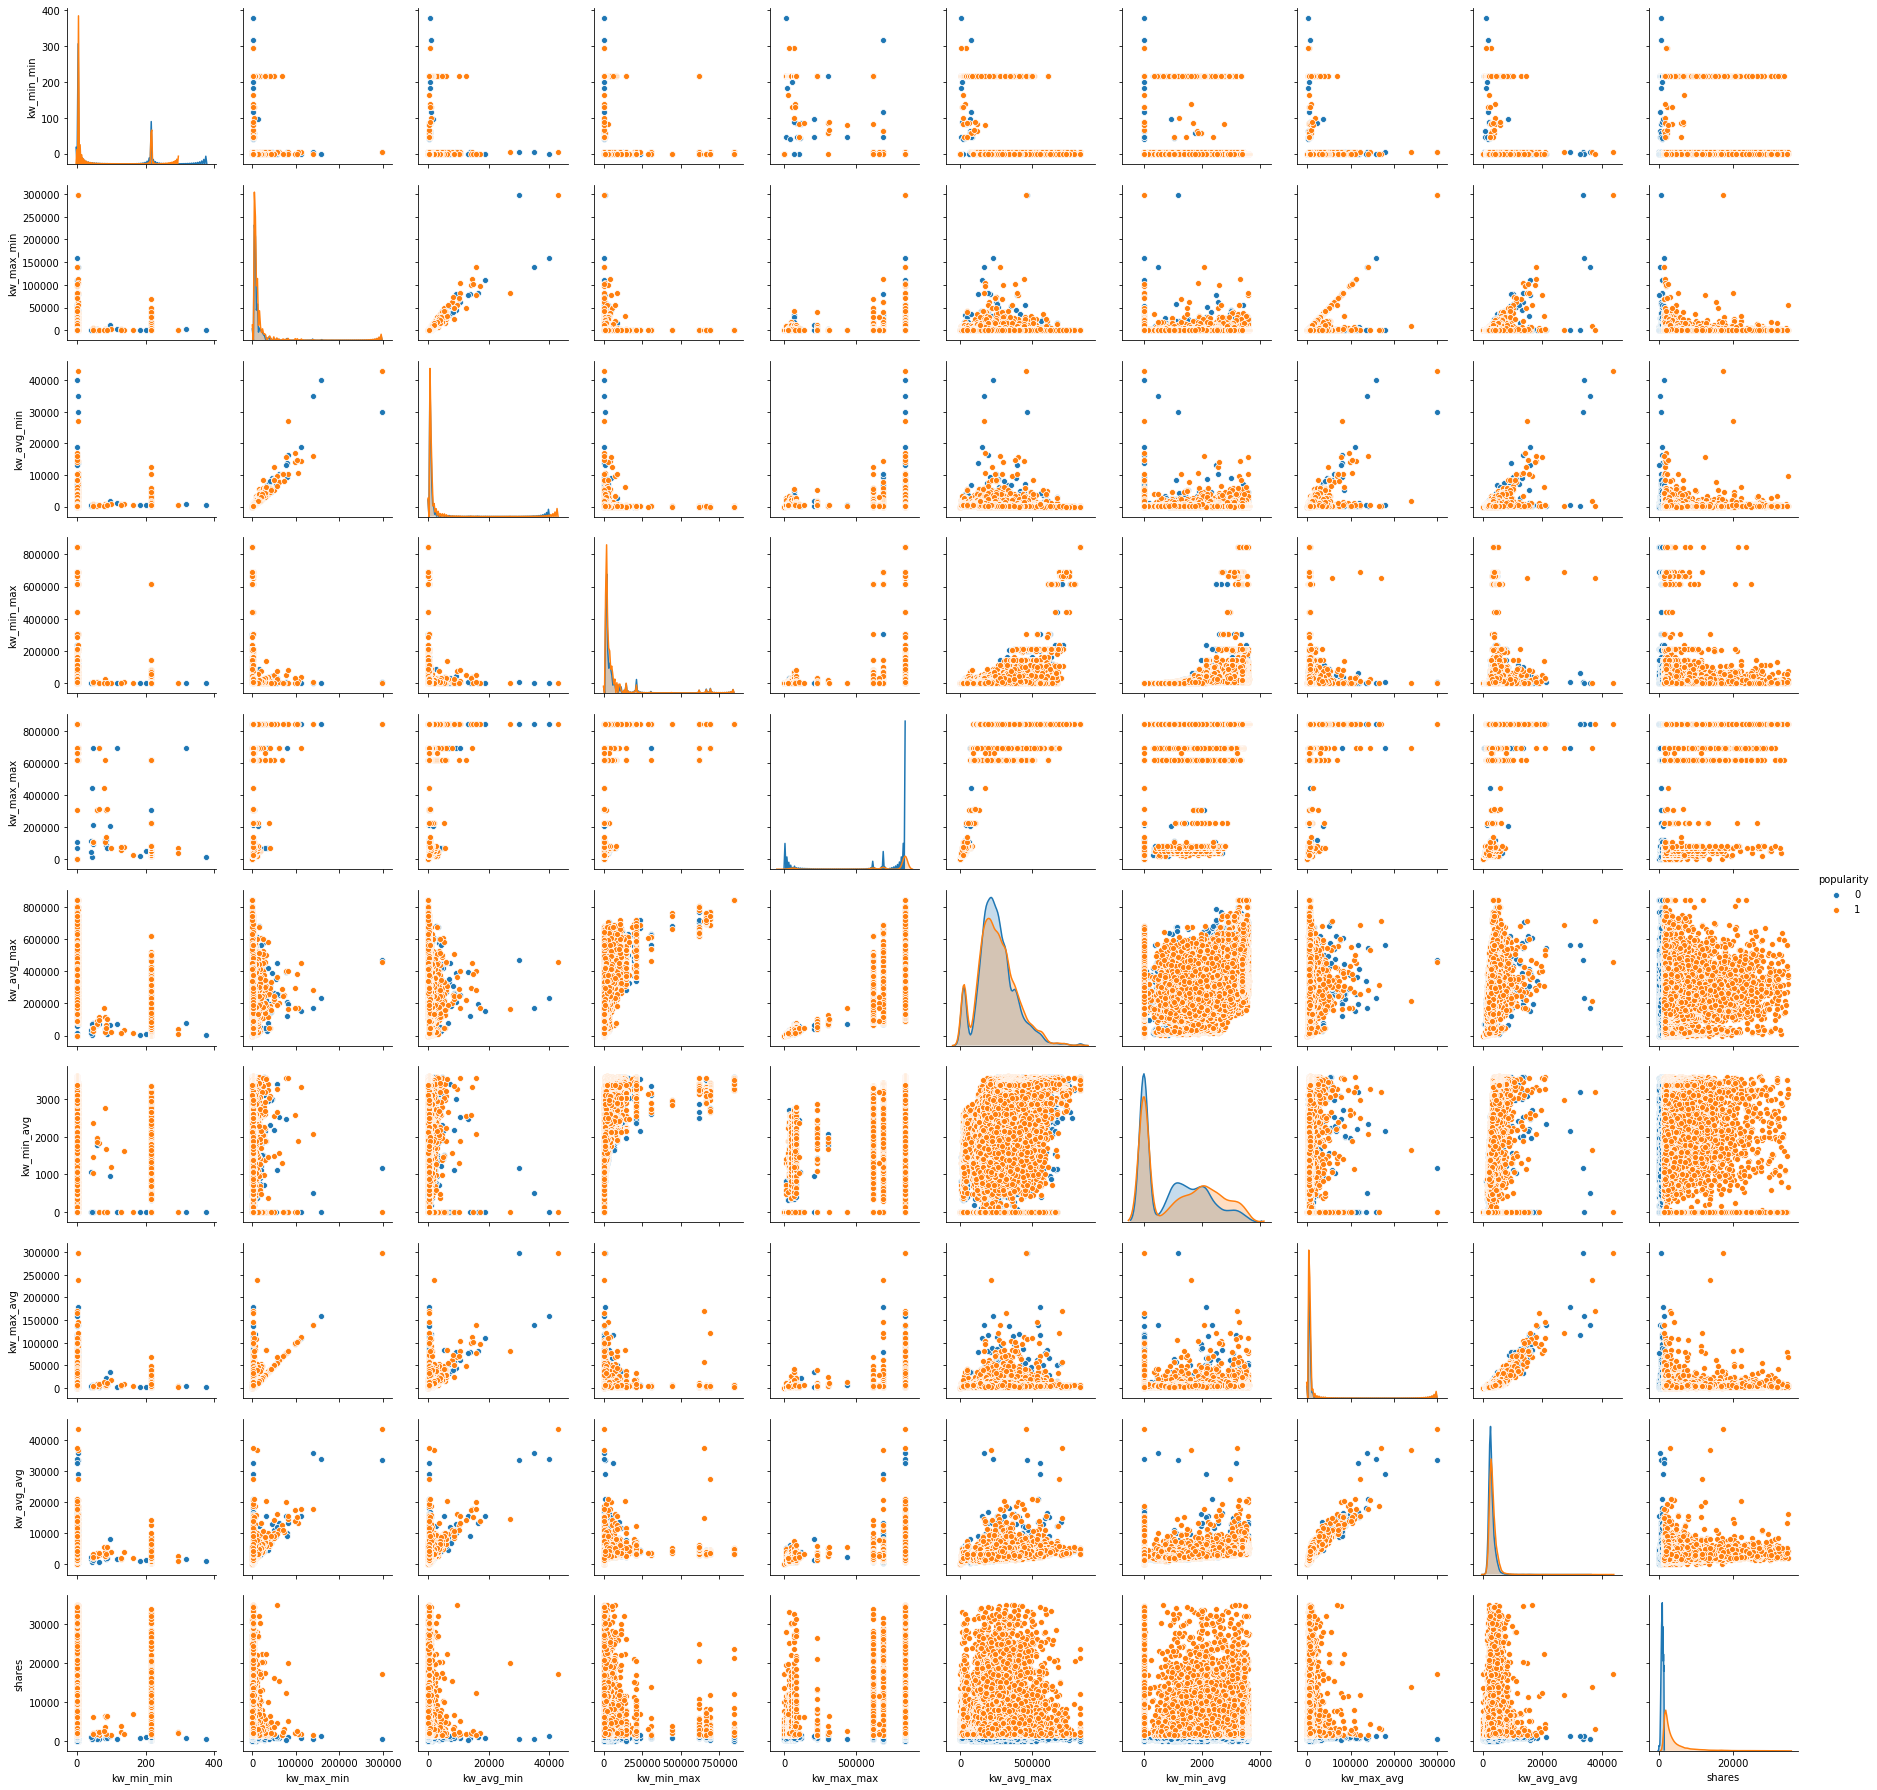

In [59]:
kw_cols = ['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 
            'kw_max_avg', 'kw_avg_avg', 'shares']
# run a pairplot
sns.pairplot(df, vars=kw_cols, hue='popularity', diag_kind='kde')

From the above it can be seen that some features are having high correlation between them like kw_avg_avg and kw_max_avg, kw_max_min and kw_avg_min,kw_max_min and kw_max_avg.
Multicollienarity exists in the dataset.

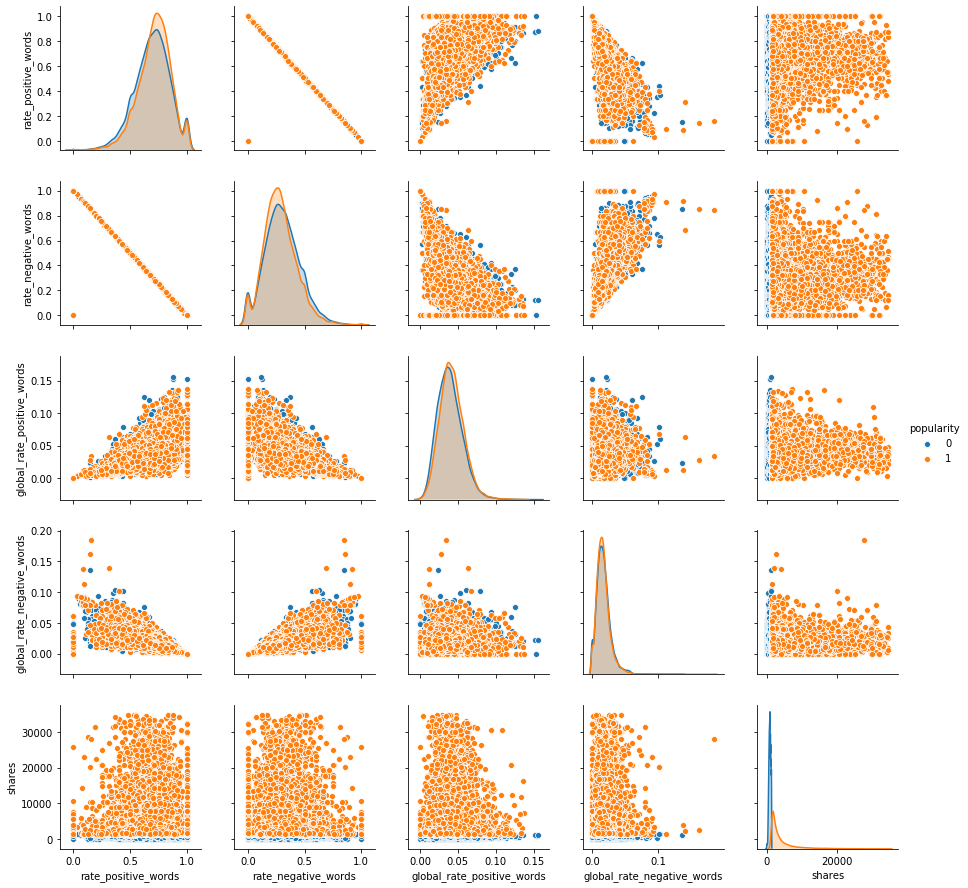

In [60]:
kw_cols = ['rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', 'shares']

sns.pairplot(df, vars=kw_cols, hue='popularity', diag_kind='kde')

There is a linear relationship between rate_positive_words and rate_negative_words.
Rate positive words and global_rate_positive_words are also having positive correlation with each other.
strong correlation can be seen between rate_negative_words and global_rate_negative_words. And no feature is having high or strong correlation with shares.

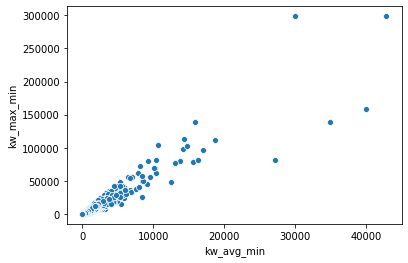

In [61]:
cols = ['self_reference_min_shares', 'self_reference_max_shares','self_reference_avg_sharess']
sns.scatterplot(df['kw_avg_min'],df['kw_max_min'])

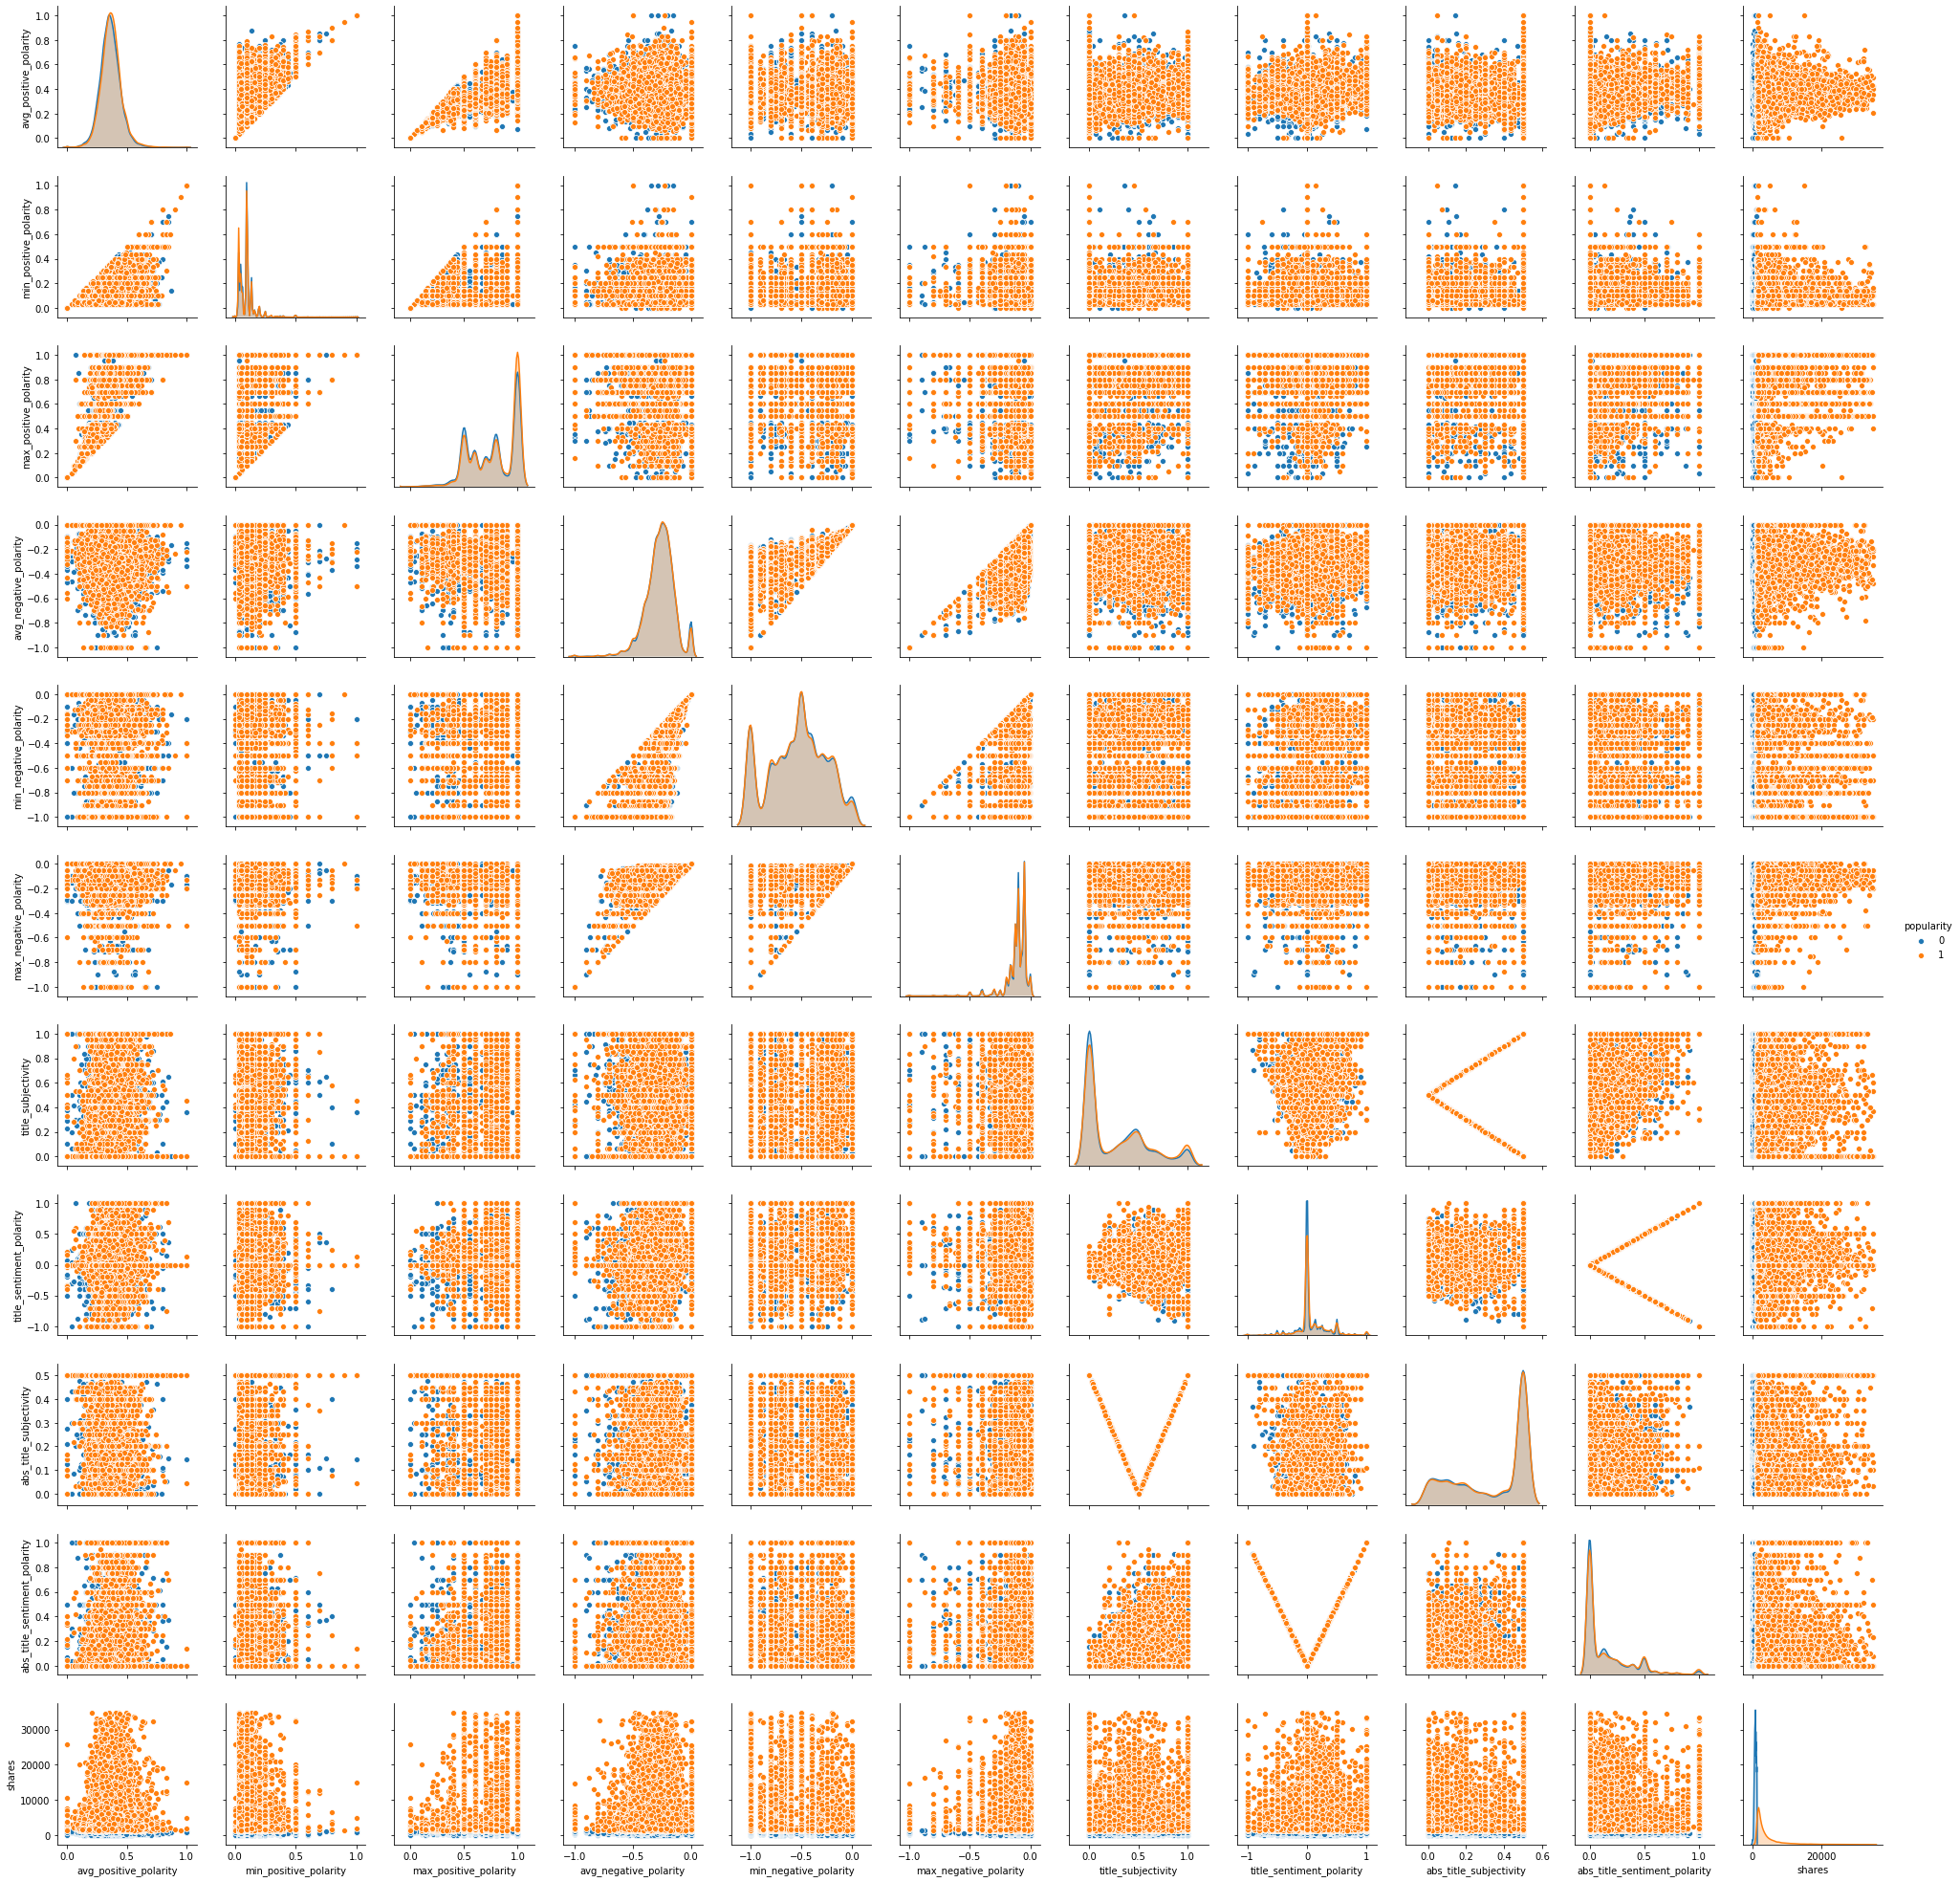

In [62]:
cols = ['avg_positive_polarity', 'min_positive_polarity','max_positive_polarity', 'avg_negative_polarity','min_negative_polarity', 'max_negative_polarity', 'title_subjectivity','title_sentiment_polarity', 'abs_title_subjectivity','abs_title_sentiment_polarity','shares']

sns.pairplot(df,vars=cols,hue='popularity',diag_kind='kde')

For popular shares, the avg_positive_polarity value lies between 0.2 - 0.5, min_positive_polarity should be less,max_positive_polarity should be greater than 0.5,and max_negative_polarity shoud be greater than -0.3

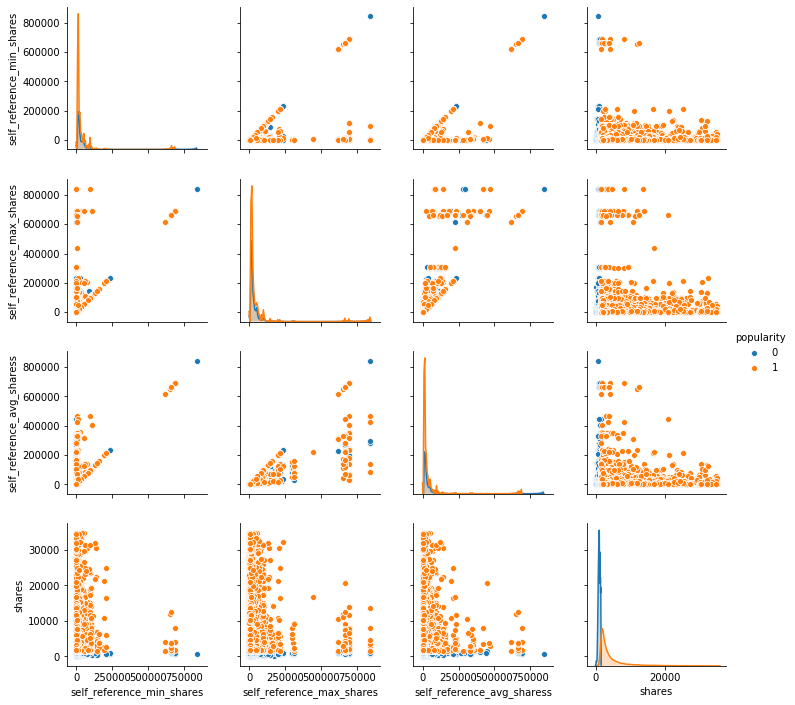

In [63]:
cols = ['self_reference_min_shares', 'self_reference_max_shares','self_reference_avg_sharess','shares']

sns.pairplot(df,vars=cols,hue='popularity',diag_kind='kde')

Some strong correlation exists between some features like self_reference_min_shares, self_reference_max_shares feature. Multicollienarity exists between them.

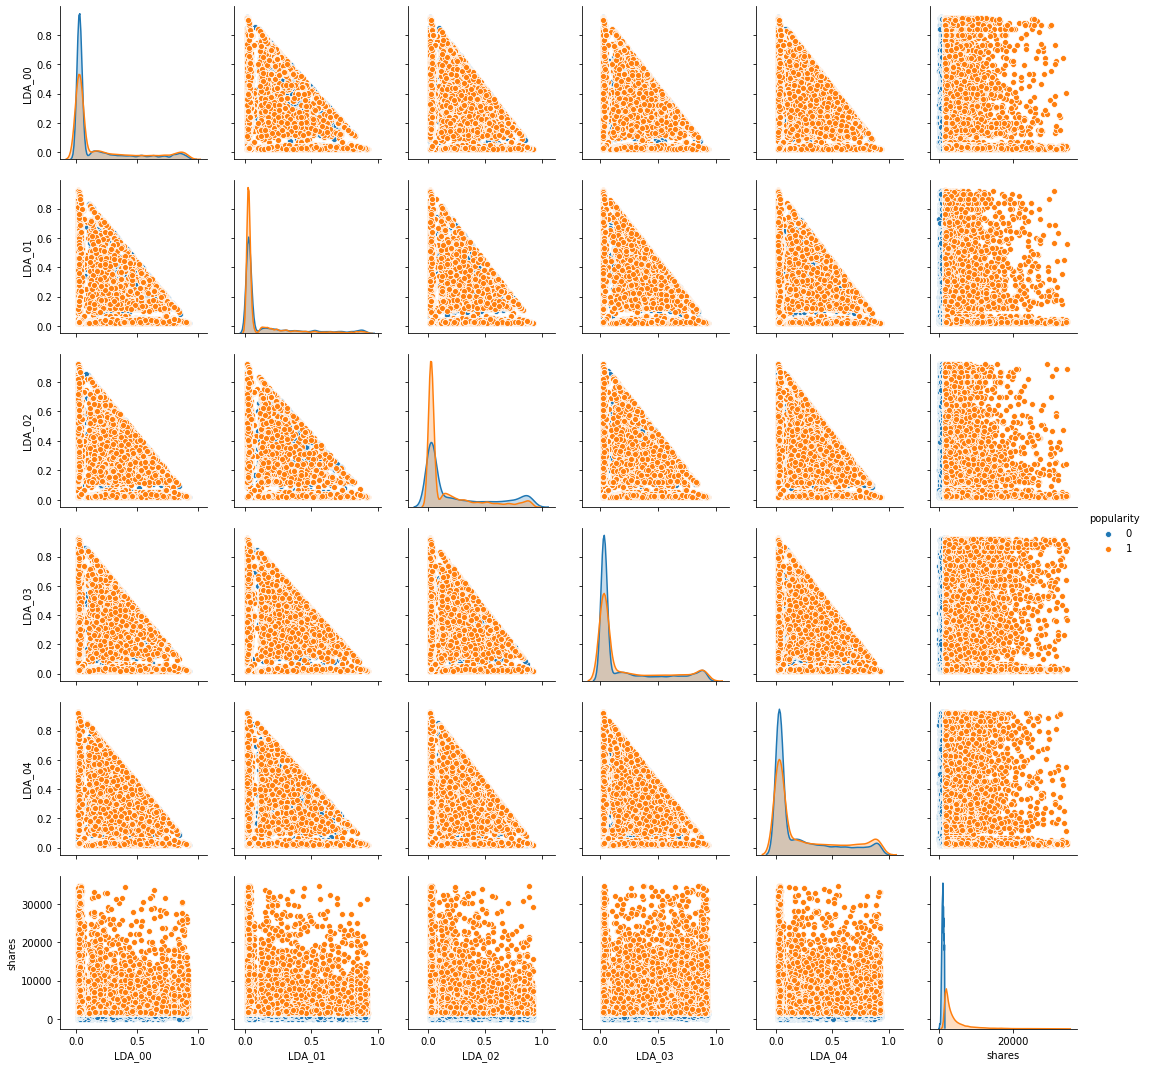

In [64]:
cols = ['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04','shares']

sns.pairplot(df,vars=cols,hue='popularity',diag_kind='kde')

There is no relation of LDA's with the popularity of the articles.

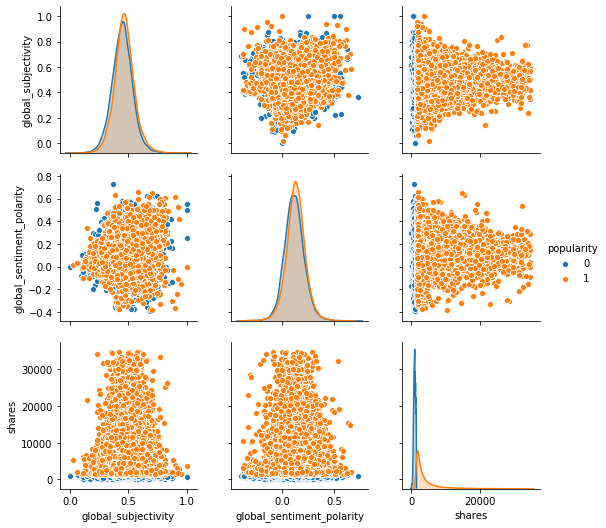

In [65]:
cols = ['global_subjectivity','global_sentiment_polarity','shares']

sns.pairplot(df,vars=cols,hue='popularity',diag_kind='kde')

Articles having Global subjectivity between 0.3-0.6 and global_sentiment_polarity between 0 - 0.3 have high chance of becoming popular.

In [66]:
# 'data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world'

In [67]:
arr = []
for i,a in enumerate(df.index):
    if(df.loc[a,'data_channel_is_lifestyle'] == 1):
        arr.append('Lifestyle')
    elif(df.loc[a,'data_channel_is_entertainment'] == 1):
        arr.append('Entertainment')
    elif(df.loc[a,'data_channel_is_bus'] == 1):
        arr.append('Bus')
    elif(df.loc[a,'data_channel_is_socmed'] == 1):
        arr.append('Socmed')
    elif(df.loc[a,'data_channel_is_tech'] == 1):
        arr.append('Tech')
    elif(df.loc[a,'data_channel_is_world'] == 1):
        arr.append('World')
    else:
        arr.append('Other')

df['data_channel'] = arr

In [68]:
df['data_channel'].value_counts()

World            8132
Tech             7297
Entertainment    6795
Bus              6195
Other            5348
Socmed           2298
Lifestyle        2060
Name: data_channel, dtype: int64

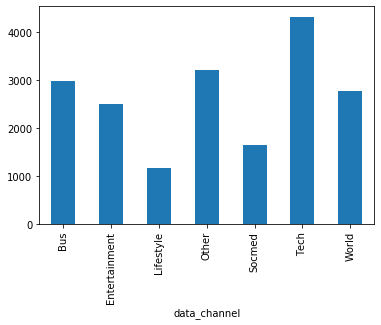

In [69]:
df.groupby(by='data_channel')['popularity'].sum().plot(kind='bar')

In [70]:
df.groupby(by='data_channel')['popularity'].sum()

data_channel
Bus              2974
Entertainment    2500
Lifestyle        1162
Other            3214
Socmed           1639
Tech             4314
World            2771
Name: popularity, dtype: int64

In [409]:
df.groupby(by='data_channel')['popularity'].count()

data_channel
Bus              6195
Entertainment    6795
Lifestyle        2060
Other            5348
Socmed           2298
Tech             7297
World            8132
Name: popularity, dtype: int64

In [408]:
(df.groupby(by='data_channel')['popularity'].sum()) / (df.groupby(by='data_channel')['popularity'].count())

data_channel
Bus              0.480065
Entertainment    0.367918
Lifestyle        0.564078
Other            0.600972
Socmed           0.713229
Tech             0.591202
World            0.340753
Name: popularity, dtype: float64

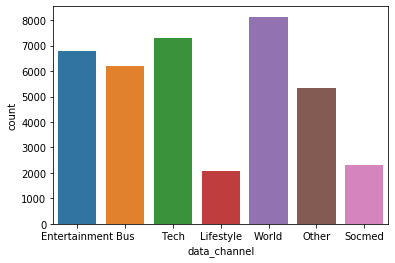

In [71]:
sns.countplot(df['data_channel'])

In [72]:
# More articles are published on the topics World, Tech and Entertainment.

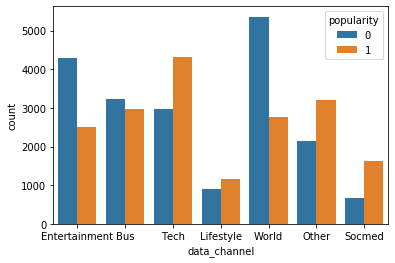

In [73]:
sns.countplot(df['data_channel'],hue=df['popularity'])

Articles related to the data channels Tech,Lifestyle,Socmed,Others are having high populartiy rate compared to the other articles.

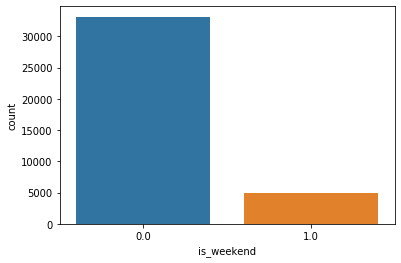

In [74]:
sns.countplot(df['is_weekend']) #  More articles are pubished on weekdays.

In [75]:
week_day = []

for i,a in enumerate(df.index):
    if(df.loc[a,'weekday_is_monday'] == 1):
        week_day.append('Monday')
    elif(df.loc[a,'weekday_is_tuesday'] == 1):
        week_day.append('Tuesday')
    elif(df.loc[a,'weekday_is_wednesday'] == 1):
        week_day.append('Wednesday')
    elif(df.loc[a,'weekday_is_thursday'] == 1):
        week_day.append('Thursday')
    elif(df.loc[a,'weekday_is_friday'] == 1):
        week_day.append('Friday')
    elif(df.loc[a,'weekday_is_saturday'] == 1):
        week_day.append('Saturday')
    else:
        week_day.append('Sunday')

df['weekday'] = week_day

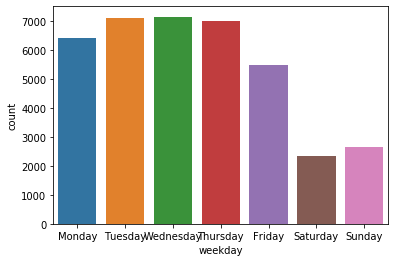

In [76]:
sns.countplot(df['weekday'])

More articles were published on Tuesday, Wednesday and Thursday.

In [77]:
pd.crosstab(df['weekday'],df['popularity'])

popularity     0     1
weekday               
Friday      2756  2734
Monday      3435  2968
Saturday     703  1645
Sunday       951  1685
Thursday    3789  3205
Tuesday     3932  3175
Wednesday   3985  3162

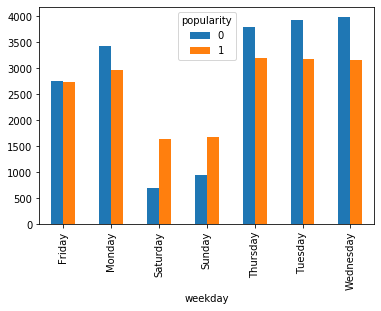

In [78]:
pd.crosstab(df['weekday'],df['popularity']).plot(kind='bar')

Articles or news published on Saturday and Sunday are high rate of becoming more popular compared to other days.

In [79]:
df[df['max_negative_polarity']< -0.25]

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
34                8.0             204.0         0.586207               1.0   
45               10.0             142.0         0.654676               1.0   
50               11.0             214.0         0.644550               1.0   
57                8.0             130.0         0.821705               1.0   
84                9.0             268.0         0.477273               1.0   
...               ...               ...              ...               ...   
39420            10.0             199.0         0.682051               1.0   
39488            12.0             181.0         0.628571               1.0   
39508            12.0             496.0         0.521368               1.0   
39564            11.0             356.0         0.615607               1.0   
39620            13.0             413.0         0.556675               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
34                     0.698413        7.0             2.0       1.0   
45                     0.792208        2.0             1.0       1.0   
50                     0.751938        2.0             1.0       0.0   
57                     0.922078        7.0             4.0       0.0   
84                     0.587879        5.0             2.0       9.0   
...                         ...        ...             ...       ...   
39420                  0.822034        4.0             1.0       0.0   
39488                  0.699187       10.0             1.0       1.0   
39508                  0.577904       51.0             1.0       1.0   
39564                  0.761702        8.0             1.0       1.0   
39620                  0.692913       11.0             2.0       1.0   

       num_videos  average_token_length  ...  min_negative_polarity  \
34            0.0              4.671569  ...                  -0.40   
45            0.0              4.274648  ...                  -0.30   
50            1.0              4.654206  ...                  -0.40   
57            0.0              4.546154  ...                  -0.40   
84            0.0              4.858209  ...                  -0.30   
...           ...                   ...  ...                    ...   
39420         0.0              4.221106  ...                  -0.50   
39488         0.0              4.845304  ...                  -0.80   
39508         0.0              5.481855  ...                  -0.70   
39564         1.0              5.176966  ...                  -0.50   
39620         0.0              4.992736  ...                  -0.75   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
34                      -0.4                0.00                  0.000000   
45                      -0.3                0.00                  0.000000   
50                      -0.4                0.85                 -0.400000   
57                      -0.4                0.25                  0.200000   
84                      -0.3                0.00                  0.000000   
...                      ...                 ...                       ...   
39420                   -0.5                0.00                  0.000000   
39488                   -0.8                0.50                  0.136364   
39508                   -0.4                0.40                  0.100000   
39564                   -0.4                0.00                  0.000000   
39620                   -0.3                0.65                  0.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity  shares  \
34                       0.50                      0.000000    3600   
45                       0.50                      0.000000     575   
50                       0.35                      0.400000    4900   
57                       0.25                      0.200000    1300   
84                       0.50                      0.000000 

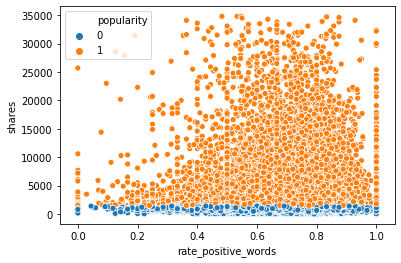

In [80]:
sns.scatterplot(df['rate_positive_words'],df['shares'],hue=df['popularity'])

Most of the popular articles published are having rate_positive_words greater than 0.4 or 0.5.

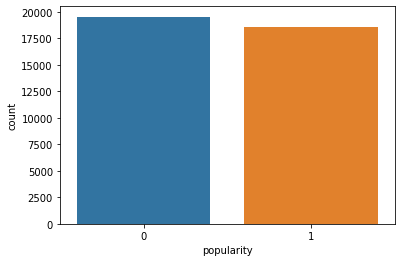

In [81]:
sns.countplot(df['popularity'])

As we have used the median of shares, the count of articles which are popular and non-popular are same. Hence we can say that this is a balanced dataset.

In [82]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0    1.0            12.0             219.0         0.663594               1.0   
1    1.0             9.0             255.0         0.604743               1.0   
2    1.0             9.0             211.0         0.575130               1.0   
3    1.0             9.0             531.0         0.503788               1.0   
4    1.0            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   ...  min_negative_polarity  max_negative_polarity  title_subjectivity  \
0  ...                 -0.600              -0.200000            0.500000   
1  ...                 -0.125              -0.100000            0.000000   
2  ...                 -0.800              -0.133333            0.000000   
3  ...                 -0.600              -0.166667            0.000000   
4  ...                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  popularity   data_channel  weekday  
0                      0.187500     593           0  Entertainment   Monday  
1                      0.000000     711           0            Bus   Monday  
2                      0.000000    1500           1            Bus   Monday  
3                      0.000000    1200           0  Entertainment   Monday  
4                      0.136364     505           0           Tech   Monday  

[5 rows x 63 columns]

In [83]:
df_constant = df_constant.drop(['shares','data_channel','weekday'],axis=1)
cols=df_constant.columns[:-1]
print(cols)
df_constant.head()

Index(['const', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_r

const  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0    1.0            12.0             219.0         0.663594               1.0   
1    1.0             9.0             255.0         0.604743               1.0   
2    1.0             9.0             211.0         0.575130               1.0   
3    1.0             9.0             531.0         0.503788               1.0   
4    1.0            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   ...  min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0  ...               0.100000                    0.7              -0.350000   
1  ...               0.033333                    0.7              -0.118750   
2  ...               0.100000                    1.0              -0.466667   
3  ...               0.136364                    0.8              -0.369697   
4  ...               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  popularity  
0                      0.187500           0  
1                      0.000000           0  
2                      0.000000           1  
3                      0.000000           0  
4                      0.136364           0  

[5 rows x 60 columns]

In [84]:
len(cols)

59

In [85]:
import statsmodels.api as sm
# Feature selection, Backward Elimination
def backward_feature_elimination(X,y,col_list):
    while len(col_list)>0 :
        model=sm.Logit(y,X[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=backward_feature_elimination(df_constant,df['popularity'],cols)

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarnin

In [86]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                38125
Model:                          Logit   Df Residuals:                    38086
Method:                           MLE   Df Model:                           38
Date:                Mon, 25 Nov 2019   Pseudo R-squ.:                 0.09500
Time:                        18:51:44   Log-Likelihood:                -23904.
converged:                       True   LL-Null:                       -26414.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_content                  0.0001    3.2e-05      4.067      0.000    6.73e-05       0.000
n_non_stop_unique_tokens         -0.8278      0.127     -6.505      0.000      -1.077      -0.578
num_hrefs                         0.0076      0.001      5.949      0.000       0.005       0.010
num_self_hrefs                   -0.0214      0.003     -6.460      0.000      -0.028      -0.015
average_token_length             -0.1542      0.028     -5.519      0.000      -0.209      -0.099
num_keywords                      0.0386      0.007      5.513      0.000       0.025       0.052
data_channel_is_lifestyle        -0.1738      0.063     -2.772      0.006      -0.297      -0.051
data_channel_is_entertainment    -0.3149      0.043     -7.367      0.000      -0.399      -0.231
data_channel_is_bus              -0.2813      0.058     -4.850      0.000      -0.395      -0.168
data_channel_is_socmed            0.7643      0.058     13.091      0.000       0.650       0.879
data_channel_is_tech              0.4617      0.052      8.816      0.000       0.359       0.564
kw_min_min                        0.0016      0.000      5.376      0.000       0.001       0.002
kw_max_min                     3.345e-05   1.14e-05      2.924      0.003     1.1e-05    5.59e-05
kw_avg_min                       -0.0002   7.37e-05     -3.114      0.002      -0.000   -8.51e-05
kw_min_max                    -6.582e-07   2.23e-07     -2.958      0.003   -1.09e-06   -2.22e-07
kw_max_max                    -4.292e-07   1.06e-07     -4.052      0.000   -6.37e-07   -2.22e-07
kw_avg_max                    -5.793e-07   1.56e-07     -3.710      0.000   -8.85e-07   -2.73e-07
kw_min_avg                    -8.757e-05   1.48e-05     -5.930      0.000      -0.000   -5.86e-05
kw_max_avg                    -8.998e-05   5.09e-06    -17.667      0.000     -0.0001      -8e-05
kw_avg_avg                        0.0007   2.89e-05     24.897      0.000       0.001       0.001
self_reference_avg_sharess     4.185e-06   6.53e-07      6.413      0.000    2.91e-06    5.46e-06
weekday_is_tuesday               -0.1406      0.037     -3.845      0.000      -0.212      -0.069
weekday_is_wednesday             -0.1279      0.037     -3.501      0.000      -0.200      -0.056
weekday_is_thursday              -0.0832      0.037     -2.268      0.023      -0.155      -0.011
weekday_is_friday                 0.1099      0.039      2.818      0.005       0.033       0.186
weekday_is_sunday                -0.2411      0.064     -3.767      0.000      -0.367      -0.116
is_weekend                        0.9169      0.055     16.786      0.000       0.810       1.024
LDA_01                           -1.1313      0.095    -11.907      0.000      -1.318      -0.945
LDA_02                           -1.3007      0.087    -14.960      0.000      -1.471      -1.130
LDA_03                           -1.1061      0.087    -12.652      0.000      -1.277      -0.935
LDA_04 

In [87]:
X = df.drop(['shares','data_channel','weekday','popularity'],axis=1)
y = df['popularity']

In [88]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [89]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626875
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.626876
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.626876
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626877
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626878
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626879
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626880
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626882
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626886
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626890
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626894
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626901
  

In [90]:
len(selected_features_BE)

39

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [255]:
X = df[selected_features_BE]
y = df['popularity']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [256]:
lr = LogisticRegression()

In [257]:
params = {
    'penalty':['l2','l1'],
    'C':[0.1,0.01,0.001,0.2,0.4,0.7,1.0]
}

In [258]:
from sklearn.model_selection import RandomizedSearchCV

In [259]:
rand_cv = RandomizedSearchCV(lr,param_distributions=params,cv = 5,n_jobs=-1)

In [260]:
rand_cv.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.01, 0.001, 0.2, 0.4, 0.7,
                                              1.0],
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
  

In [261]:
lr_opt = LogisticRegression(**rand_cv.best_params_)
lr_opt.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
print(lr_opt.score(X_train,y_train))
print(lr_opt.score(X_test,y_test))

0.6538389478023008
0.6509879349536632


In [263]:
print(confusion_matrix(y_test,lr_opt.predict(X_test)))

[[4018 1820]
 [2172 3428]]


In [265]:
print(accuracy_score(y_test,lr_opt.predict(X_test)))
fpr,tpr,thresh = roc_curve(y_test,lr_opt.predict_proba(X_test)[:,1])
print('ROC AUC Score',roc_auc_score(y_test,lr_opt.predict_proba(X_test)[:,1]))

0.6509879349536632
ROC AUC Score 0.7037637950863799


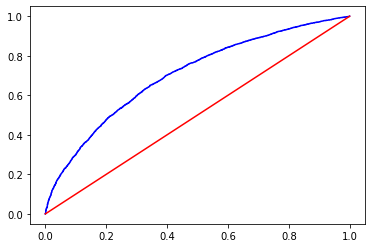

In [268]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')

In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
# confusion_matrix(y_test,lr.predict(X_test))

In [202]:
from sklearn.metrics import classification_report
# print(classification_report(y_test,lr.predict(X_test)))

In [106]:
# Without feature selection,
X = df.drop(['shares','data_channel','weekday','popularity'],axis=1)
y = df['popularity']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [107]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5927230486753851
0.6034271725826194


In [108]:
# RFE
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,len(X.columns))            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

Optimum number of features: 48
Score with 48 features: 0.652999


In [109]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 48)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_avg_min', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_negative_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_

In [110]:
# removing collinear variables
# function definition
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
#         print("Iteration no.",i)
#         print(vif)
        a = np.argmax(vif)
#         print("Max VIF is for variable no.:",a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

train_out = calculate_vif(X)

E:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [111]:
train_out.head()

n_tokens_content  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0             219.0        4.0             2.0       1.0         0.0   
1             255.0        3.0             1.0       1.0         0.0   
2             211.0        3.0             1.0       1.0         0.0   
3             531.0        9.0             0.0       1.0         0.0   
4            1072.0       19.0            19.0      20.0         0.0   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                        0.0                            1.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            0.0   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  ...  \
0                  0.0                     0.0                   0.0  ...   
1                  1.0                     0.0                   0.0  ...   
2                  1.0                     0.0                   0.0  ...   
3                  0.0                     0.0                   0.0  ...   
4                  0.0                     0.0                   1.0  ...   

   is_weekend    LDA_00    LDA_01    LDA_03  global_sentiment_polarity  \
0         0.0  0.500331  0.378279  0.041263                   0.092562   
1         0.0  0.799756  0.050047  0.050101                   0.148948   
2         0.0  0.217792  0.033334  0.033334                   0.323333   
3         0.0  0.028573  0.419300  0.028905                   0.100705   
4         0.0  0.028633  0.028794  0.028572                   0.281003   

   min_positive_polarity  max_negative_polarity  title_subjectivity  \
0               0.100000              -0.200000            0.500000   
1               0.033333              -0.100000            0.000000   
2               0.100000              -0.133333            0.000000   
3               0.136364              -0.166667            0.000000   
4               0.033333              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_sentiment_polarity  
0                 -0.187500                      0.187500  
1                  0.000000                      0.000000  
2                  0.000000                      0.000000  
3                  0.000000                      0.000000  
4                  0.136364                      0.136364  

[5 rows x 33 columns]

In [112]:
train_out.columns

Index(['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_03',
       'global_sentiment_polarity', 'min_positive_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_sentiment_polarity'],
      dtype='object')

In [113]:
# Accuracy of model using features from vif method.
X = df[train_out.columns]
y = df['popularity']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
lr = LogisticRegression()
params = {
    'penalty':['l2','l1'],
    'C':[0.1,0.01,0.001,0.2,0.4,0.7,1.0]
}

In [114]:
rand_cv = RandomizedSearchCV(lr,param_distributions=params,cv = 5,n_jobs=-1)

In [115]:
rand_cv.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.01, 0.001, 0.2, 0.4, 0.7,
                                              1.0],
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
  

In [116]:
lr_opt = LogisticRegression(**rand_cv.best_params_)
lr_opt.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
print(lr_opt.score(X_train,y_train))
print(lr_opt.score(X_test,y_test))

0.6379135908869487
0.6335897884245497


In [118]:
# Accuracy of model using features selected by RFE,
X = df[selected_features_rfe]
y = df['popularity']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
lr = LogisticRegression()
params = {
    'penalty':['l2','l1'],
    'C':[0.1,0.01,0.001,0.2,0.4,0.7,1.0]
}
rand_cv = RandomizedSearchCV(lr,param_distributions=params,cv = 5,n_jobs=-1)

In [119]:
rand_cv.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.01, 0.001, 0.2, 0.4, 0.7,
                                              1.0],
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
  

In [120]:
lr_opt = LogisticRegression(**rand_cv.best_params_)
lr_opt.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
print(lr_opt.score(X_train,y_train))
print(lr_opt.score(X_test,y_test))

0.6511035335556639
0.6481028151774786


In [122]:
# Best Accuracy obtained by backward elimination method with minimum number of features.

In [123]:
print('Best features using Backward elimination method are :',selected_features_BE)

Best features using Backward elimination method are : ['n_tokens_content', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_saturday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'global_subjectivity', 'global_rate_positive_words', 'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']


In [ ]:
# Decision Tree

In [134]:
X = df[selected_features_BE]
y = df['popularity']

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [137]:
dtree = DecisionTreeClassifier()

In [138]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,8],
    'max_features':[5,10,12,15,20,25],
    'splitter':['best','random']
}
rf_tree = RandomizedSearchCV(dtree,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,scoring='accuracy')
rf_tree.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [139]:
d_tree = DecisionTreeClassifier(**rf_tree.best_params_)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
print(d_tree.score(X_train,y_train))
print(d_tree.score(X_test,y_test))

0.6375014051785514
0.6289561112082532


In [141]:
print(classification_report(y_test,d_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      5838
           1       0.63      0.59      0.61      5600

    accuracy                           0.63     11438
   macro avg       0.63      0.63      0.63     11438
weighted avg       0.63      0.63      0.63     11438



In [142]:
from sklearn.metrics import roc_auc_score,roc_curve

In [143]:
confusion_matrix(y_test,d_tree.predict(X_test))

array([[3887, 1951],
       [2293, 3307]], dtype=int64)

In [144]:
fpr,tpr,thresh = roc_curve(y_test,d_tree.predict_proba(X_test)[:,1])

In [145]:
roc_auc_score(y_test,d_tree.predict_proba(X_test)[:,1])

0.6808051619928547

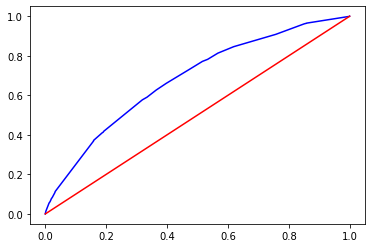

In [146]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')

In [147]:
X_orig = df.drop(['shares','data_channel','weekday','popularity'],axis=1)
y_orig = df['popularity']
X_train_orig,X_test_orig,y_train_orig,y_test_orig = train_test_split(X_orig,y_orig,test_size=0.3,random_state=42)

In [148]:
d_tree_orig = DecisionTreeClassifier()

params = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,8,1),
    'min_samples_leaf':[3,6,7,8,10,15],
    'max_features':range(7,35,3)
}

rand_tree_orig = RandomizedSearchCV(d_tree_orig,param_distributions=params,cv=5,n_iter=10,n_jobs=-1)
rand_tree_orig.fit(X_train_orig,y_train_orig)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [149]:
d_tree_orig = DecisionTreeClassifier(**rand_tree_orig.best_params_)
d_tree_orig.fit(X_train_orig,y_train_orig)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=31, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [150]:
print(classification_report(y_test_orig,d_tree_orig.predict(X_test_orig)))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      5838
           1       0.62      0.62      0.62      5600

    accuracy                           0.63     11438
   macro avg       0.63      0.63      0.63     11438
weighted avg       0.63      0.63      0.63     11438



In [151]:
print(d_tree_orig.score(X_train_orig,y_train_orig))
print(d_tree_orig.score(X_test_orig,y_test_orig))

0.6394873908644658
0.6265955586641021


In [152]:
from sklearn.metrics import accuracy_score

In [153]:
# Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
rf = RandomForestClassifier()
 
params = {
    'n_estimators':range(100,1000,100),
    'criterion':['gini','entropy'],
    'max_depth':range(5,10),
#     'max_features':['auto','log2','sqrt'],
    'max_features':range(5,39,2),
    'bootstrap':[True,False]
}

rand_rf = RandomizedSearchCV(rf,param_distributions=params,cv=5,n_iter=10,n_jobs=-1,random_state=42)
rand_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [394]:
# rand_rf.best_params_

In [294]:
rf = RandomForestClassifier(**rand_rf.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [317]:
print(accuracy_score(y_test,rf.predict(X_test)))
fpr,tpr,thresh = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
print('ROC AUC Score',roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))

0.6614792795943347
ROC AUC Score 0.7238239000636226


In [405]:
print(rf.score(X_test,y_test))

0.6614792795943347


In [318]:
print(rf.score(X_train,y_train))

0.7079476898864616


In [388]:
f1_score(y_test,rf.predict(X_test))

0.6430678466076697

In [252]:
# from sklearn.preprocessing import binarize
# for i in range(1,10):
#     cm2=0
#     y_pred_prob_yes=rf.predict_proba(X_test)
#     y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
#     cm2=confusion_matrix(y_test,y_pred2)
#     print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
#             'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
#           'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

In [319]:
confusion_matrix(y_test,rf.predict(X_test))

array([[4078, 1760],
       [2112, 3488]], dtype=int64)

In [320]:
from sklearn.metrics import recall_score

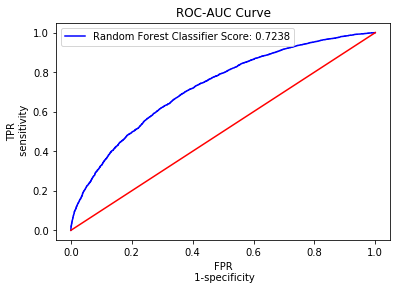

In [326]:
plt.plot(fpr,tpr,color='b',label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot(fpr,fpr,color='r')
plt.xlabel('FPR\n 1-specificity')
plt.ylabel('TPR\n sensitivity')
plt.title('ROC-AUC Curve')
plt.legend()

In [161]:
# XGBOOST

In [162]:
import xgboost
xgb = xgboost.XGBClassifier()

In [163]:
hyper_parameter_grid = {
    'max_depth':range(2,50,4),
    'learning_rate':[0.1,0.01,0.001,0.2,0.5,0.7,1],
    'n_estimators':range(100,1000,100),
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear']
}

In [164]:
rand_xgb = RandomizedSearchCV(xgb,param_distributions=hyper_parameter_grid,n_jobs=-1,n_iter=10,cv=5)

rand_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [165]:
xgb = xgboost.XGBClassifier(**rand_xgb.best_params_)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [166]:
print(accuracy_score(y_test,xgb.predict(X_test)))
fpr,tpr,thresh = roc_curve(y_test,xgb.predict_proba(X_test)[:,1])
print('ROC AUC Score',roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1]))

0.653610771113831
ROC AUC Score 0.7151623752018793


Text(0, 0.5, 'TPR')

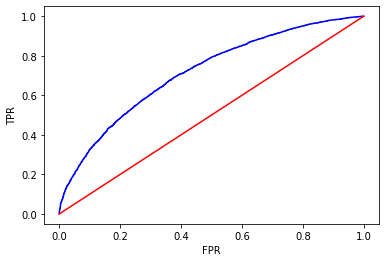

In [167]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
# ADA BOOST

In [192]:
from sklearn.ensemble import AdaBoostClassifier

In [193]:
adaboost = AdaBoostClassifier()

In [194]:
param = {
    'base_estimator':[LogisticRegression()],
    'n_estimators':range(10,100,10),
    'learning_rate':[0.1,0.01,0.001,0.2,0.5,0.7,1.0]
}

In [195]:
rand_ada = RandomizedSearchCV(adaboost,param_distributions=param,cv=5,n_iter=5,n_jobs=-1)

rand_ada.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'base_estimator': [LogisticRegression(C=1.0,
                                                                              class_weight=None,
                                                                              dual=False,
                                                                              fit_intercept=True,
                                                                              intercept_scaling=1,
                                                                              l1_ra

In [197]:
rand_ada.best_params_

{'n_estimators': 80,
 'learning_rate': 1.0,
 'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False)}

In [196]:
adaboost = AdaBoostClassifier(**rand_ada.best_params_)
adaboost.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=80, random_state=None)

In [198]:
print(accuracy_score(y_test,adaboost.predict(X_test)))
fpr,tpr,thresh = roc_curve(y_test,adaboost.predict_proba(X_test)[:,1])
print('ROC AUC Score',roc_auc_score(y_test,adaboost.predict_proba(X_test)[:,1]))

0.6467039692253891
ROC AUC Score 0.7006137742866931


Text(0, 0.5, 'TPR')

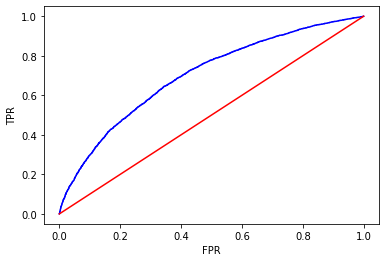

In [199]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')

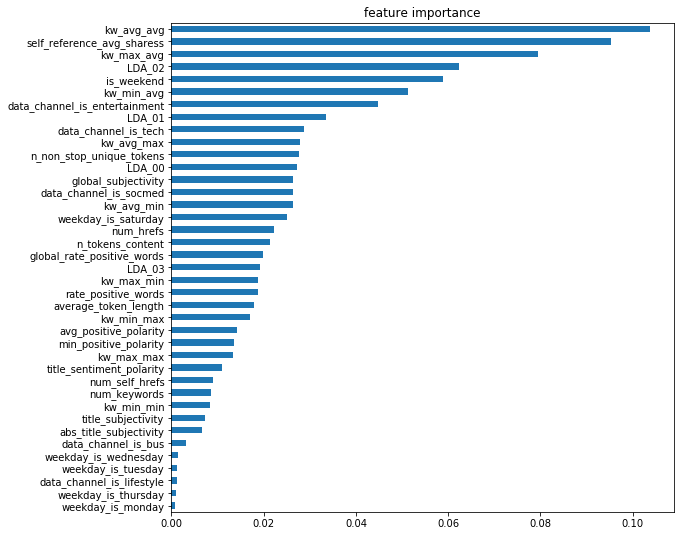

In [420]:
featImp=pd.Series(rf.feature_importances_,[x for x in X_train.columns]).sort_values(ascending=False)
plt.figure(figsize=(9,9))
featImp.sort_values(ascending=True).plot(kind="barh",title="feature importance")

In [353]:
model_dict={'Models Used':['LogisticRegression','DecisionTree','RandomForest','XgBoost','ADABoost-LR','LightGBM'],'Accuracy':[0.6013,0.6289,0.6615,0.6536,0.6467,0.6668],'Roc-Auc Score':[0.6387,0.6808,0.7238,0.7152,0.7006,0.7295]}
pd.DataFrame(model_dict,columns=['Models Used','Accuracy','Roc-Auc Score'])

Models Used  Accuracy  Roc-Auc Score
0  LogisticRegression    0.6013         0.6387
1        DecisionTree    0.6289         0.6808
2        RandomForest    0.6615         0.7238
3             XgBoost    0.6536         0.7152
4         ADABoost-LR    0.6467         0.7006
5            LightGBM    0.6668         0.7295

In [ ]:
# Best Results obtained from Random Forest model with accuracy of 0.6638398321384857 and ROC AUC Score of 0.727960927176626.